In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option("display.max.columns", None)

In [2]:
#importing train and test dataset
train=pd.read_csv('house_price/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
test=pd.read_csv('house_price/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


# initial operations

In [4]:
print(train.shape)
print(test.shape)

(1168, 81)
(292, 80)


1. size of train dataset is 1168*81 including the target variable
2. size of test dataset is 292*80.

In [5]:
#checking the null values
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
#getting idea of teh datasets
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Alley, PoolQC and MIscFeatures have very less non null values in train dataset

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

Alley, PoolQC and MIscFeatures have very less non null values in test dataset

# primary cleaning

In [8]:
#creating duplicates and dropping columns which have very less non null values
train_ds=train
test_ds=test
train.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace=True)
test.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace=True)

In [9]:
#making seperate lists of categorical and continuos varioables
categorical=[x for x in train.columns if train[x].dtype==object]
cont=[x for x in train.columns if x not in categorical]

In [10]:
#checking count of each values in the train dataset
for i in categorical:
    print(train[i].value_counts())
    print('---------------')

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
---------------
Pave    1164
Grvl       4
Name: Street, dtype: int64
---------------
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
---------------
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
---------------
AllPub    1168
Name: Utilities, dtype: int64
---------------
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
---------------
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64
---------------
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
Veenker      9
MeadowV      9
NPkVill      8
Bl

In [11]:
#getting correlation 
corr=train.corr()
pd.set_option("display.max.rows", None)

In [12]:
#getting correlation with target column
corr['SalePrice']

Id              -0.023897
MSSubClass      -0.060775
LotFrontage      0.341294
LotArea          0.249499
OverallQual      0.789185
OverallCond     -0.065642
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.466386
BsmtFinSF1       0.362874
BsmtFinSF2      -0.010151
BsmtUnfSF        0.215724
TotalBsmtSF      0.595042
1stFlrSF         0.587642
2ndFlrSF         0.330386
LowQualFinSF    -0.032381
GrLivArea        0.707300
BsmtFullBath     0.212924
BsmtHalfBath    -0.011109
FullBath         0.554988
HalfBath         0.295592
BedroomAbvGr     0.158281
KitchenAbvGr    -0.132108
TotRmsAbvGrd     0.528363
Fireplaces       0.459611
GarageYrBlt      0.474346
GarageCars       0.628329
GarageArea       0.619000
WoodDeckSF       0.315444
OpenPorchSF      0.339500
EnclosedPorch   -0.115004
3SsnPorch        0.060119
ScreenPorch      0.100284
PoolArea         0.103280
MiscVal         -0.013071
MoSold           0.072764
YrSold          -0.045508
SalePrice        1.000000
Name: SalePr

In [13]:
#dropping the columns that are least related with the target
train.drop(['Id','MSSubClass','Street','LandContour','Utilities','LotConfig','LandSlope','BldgType','OverallCond','MasVnrType','BsmtFinType1','BsmtFinType2','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','FireplaceQu','Fence','MoSold','YrSold','SaleType','Condition2','Exterior2nd','BsmtCond','GarageQual','3SsnPorch','MiscVal'],axis=1,inplace=True)
test.drop(['Id','MSSubClass','Street','LandContour','Utilities','LotConfig','LandSlope','BldgType','OverallCond','MasVnrType','BsmtFinType1','BsmtFinType2','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','FireplaceQu','Fence','MoSold','YrSold','SaleType','Condition2','Exterior2nd','BsmtCond','GarageQual','3SsnPorch','MiscVal'],axis=1,inplace=True)

In [14]:
#checking shape after dropping columns
train.shape

(1168, 52)

In [15]:
test.shape

(292, 51)

In [16]:
train.corr()['SalePrice']

LotFrontage      0.341294
LotArea          0.249499
OverallQual      0.789185
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.466386
BsmtFinSF1       0.362874
BsmtUnfSF        0.215724
TotalBsmtSF      0.595042
1stFlrSF         0.587642
2ndFlrSF         0.330386
GrLivArea        0.707300
BsmtFullBath     0.212924
FullBath         0.554988
HalfBath         0.295592
BedroomAbvGr     0.158281
KitchenAbvGr    -0.132108
TotRmsAbvGrd     0.528363
Fireplaces       0.459611
GarageYrBlt      0.474346
GarageCars       0.628329
GarageArea       0.619000
WoodDeckSF       0.315444
OpenPorchSF      0.339500
EnclosedPorch   -0.115004
ScreenPorch      0.100284
PoolArea         0.103280
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [17]:
train.corr()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice
LotFrontage,1.000000,0.557257,0.247809,0.118554,0.096050,0.202225,0.247780,0.123943,0.386261,0.448186,0.099250,0.410414,0.104255,0.189321,0.053168,0.264010,-0.002890,0.351969,0.262076,0.061101,0.276798,0.344908,0.101751,0.167092,0.023118,0.033111,0.223429,0.341294
LotArea,0.557257,1.000000,0.107188,0.005506,0.027228,0.121448,0.221851,0.006600,0.259733,0.312843,0.059803,0.281360,0.142387,0.123197,0.007271,0.117351,-0.013075,0.184546,0.285983,-0.034981,0.158313,0.195162,0.216720,0.093080,-0.007446,0.025256,0.097107,0.249499
OverallQual,0.247809,0.107188,1.000000,0.575800,0.555945,0.409163,0.219643,0.308676,0.528285,0.458758,0.316624,0.599700,0.101732,0.548824,0.296134,0.099639,-0.178220,0.432579,0.390067,0.541719,0.596322,0.566782,0.227137,0.341030,-0.098374,0.059387,0.072247,0.789185
YearBuilt,0.118554,0.005506,0.575800,1.000000,0.592829,0.323006,0.227933,0.155559,0.386265,0.279450,0.011834,0.198644,0.164983,0.471264,0.243227,-0.080639,-0.167869,0.095476,0.134313,0.826366,0.525346,0.473216,0.204830,0.191069,-0.373544,-0.058760,0.006408,0.514408
YearRemodAdd,0.096050,0.027228,0.555945,0.592829,1.000000,0.181869,0.114430,0.174732,0.280720,0.233384,0.155102,0.295048,0.104643,0.444446,0.194943,-0.035847,-0.139943,0.206923,0.118378,0.639153,0.428325,0.387744,0.197410,0.238755,-0.193574,-0.046220,0.006874,0.507831
MasVnrArea,0.202225,0.121448,0.409163,0.323006,0.181869,1.000000,0.267066,0.109850,0.366833,0.339938,0.173358,0.387891,0.086720,0.268545,0.200926,0.091717,-0.038281,0.279391,0.243812,0.254547,0.342553,0.365849,0.151978,0.131850,-0.102321,0.046509,0.013590,0.466386
BsmtFinSF1,0.247780,0.221851,0.219643,0.227933,0.114430,0.267066,1.000000,-0.499861,0.518940,0.445876,-0.127656,0.217160,0.645126,0.054511,0.015767,-0.114888,-0.065450,0.043499,0.257482,0.135558,0.197529,0.286290,0.192939,0.108802,-0.082351,0.033490,0.154769,0.362874
BsmtUnfSF,0.123943,0.006600,0.308676,0.155559,0.174732,0.109850,-0.499861,1.000000,0.414186,0.307437,0.002736,0.232920,-0.431740,0.272193,-0.044025,0.156056,0.015532,0.237043,0.040509,0.192237,0.221097,0.191177,-0.001966,0.138456,-0.013251,0.001076,-0.039029,0.215724
TotalBsmtSF,0.386261,0.259733,0.528285,0.386265,0.280720,0.366833,0.518940,0.414186,1.000000,0.813357,-0.164795,0.461067,0.296654,0.311120,-0.037014,0.036237,-0.065410,0.273895,0.328241,0.313928,0.423592,0.492980,0.234848,0.249284,-0.087751,0.064434,0.139252,0.595042
1stFlrSF,0.448186,0.312843,0.458758,0.279450,0.233384,0.339938,0.445876,0.307437,0.813357,1.000000,-0.205683,0.566049,0.238026,0.374354,-0.122019,0.106293,0.084392,0.399177,0.406537,0.219750,0.414905,0.475958,0.235467,0.211107,-0.047798,0.070193,0.144006,0.587642


In [18]:
train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [19]:
#creating new categorical and cont variable list and label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
categorical=[x for x in train.columns if train[x].dtype==object]
cont=[x for x in train.columns if x not in categorical]
le=LabelEncoder()
for i in categorical:
    train[i].fillna(train[i].mode()[0],inplace=True)
    test[i].fillna(test[i].mode()[0],inplace=True)
for i in categorical:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])

# univariate analysis

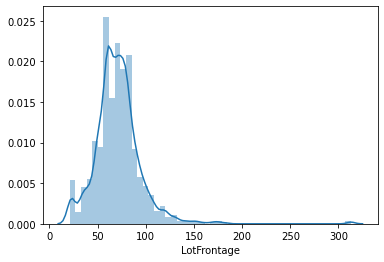

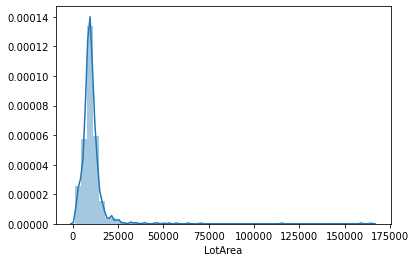

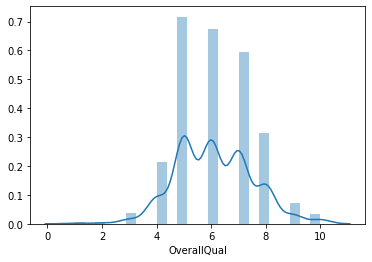

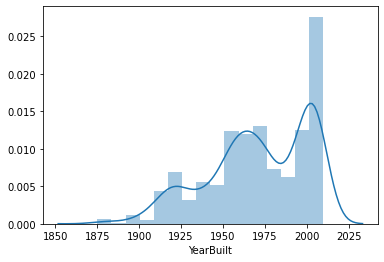

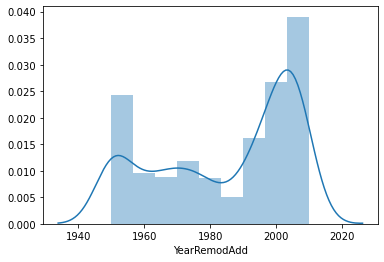

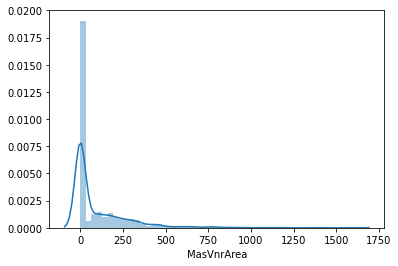

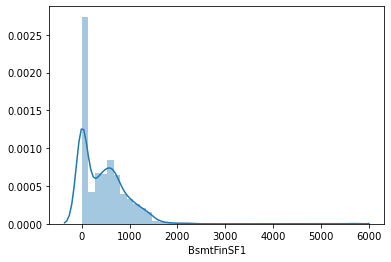

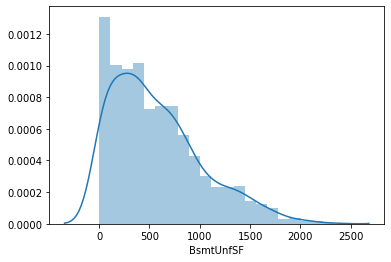

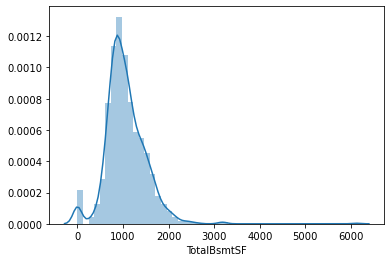

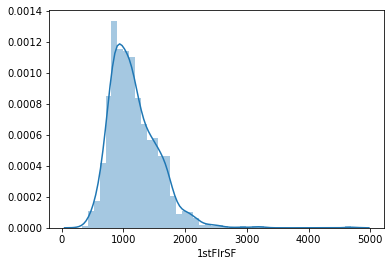

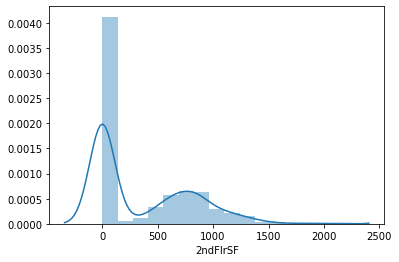

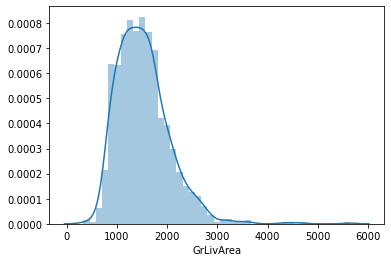

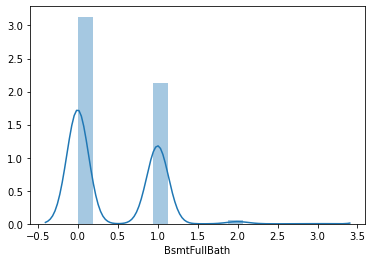

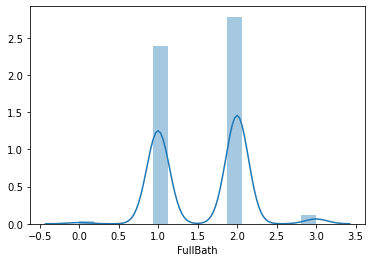

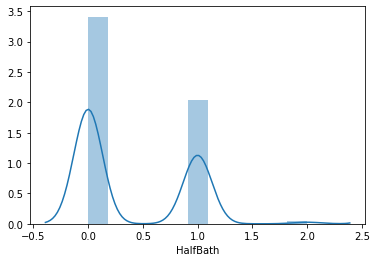

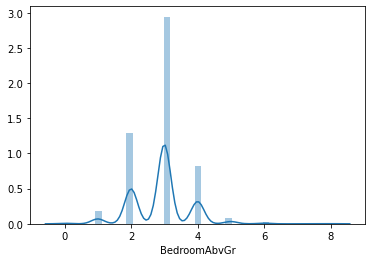

C:\Users\atakle\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


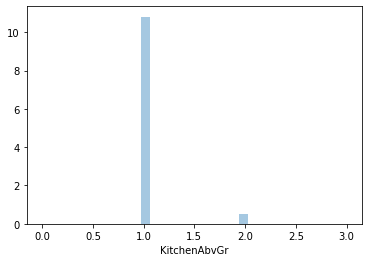

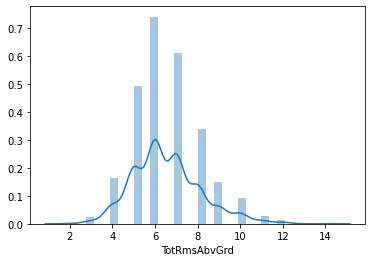

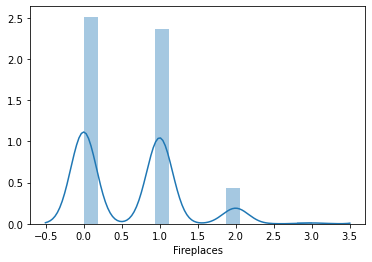

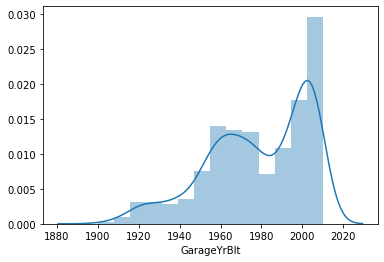

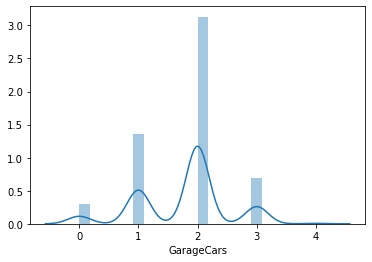

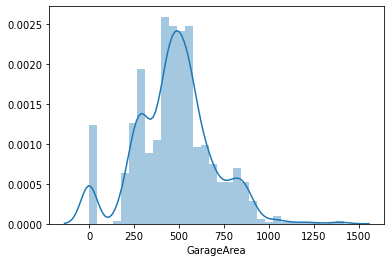

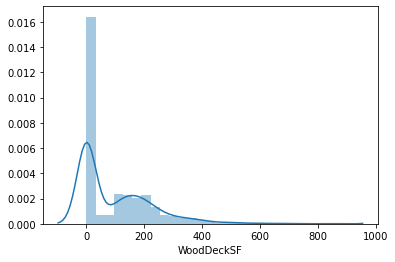

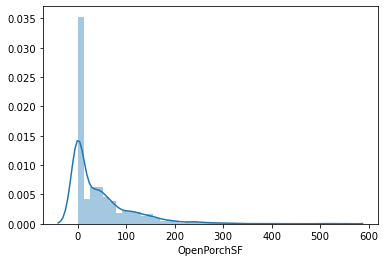

C:\Users\atakle\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


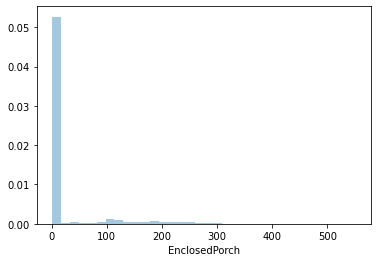

C:\Users\atakle\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


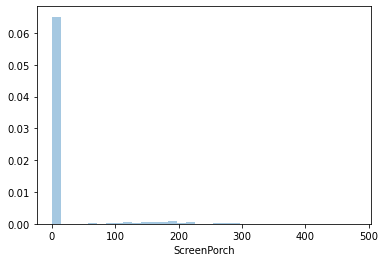

C:\Users\atakle\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


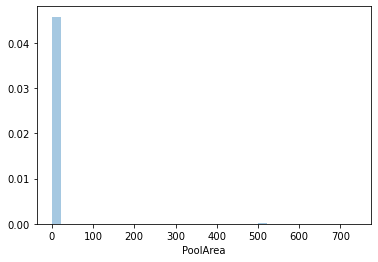

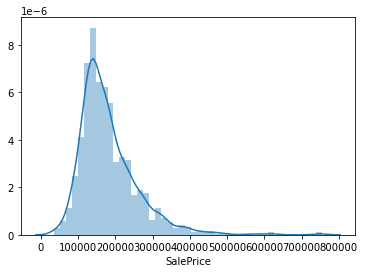

In [20]:
#getting distribution o data in continuous columns
for i in cont:
    sns.distplot(train[i])
    plt.show()

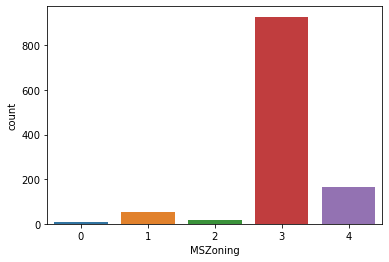

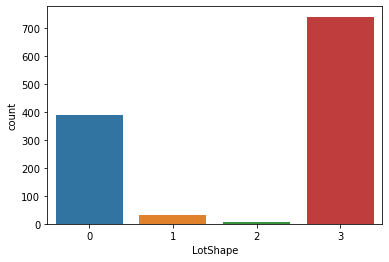

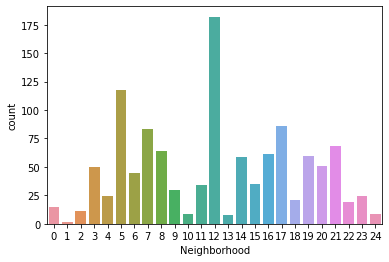

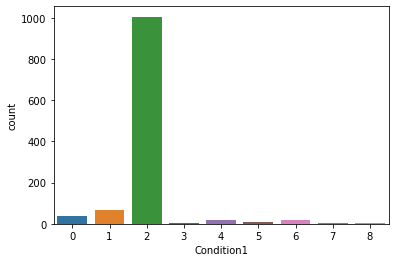

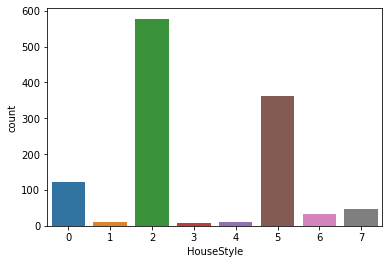

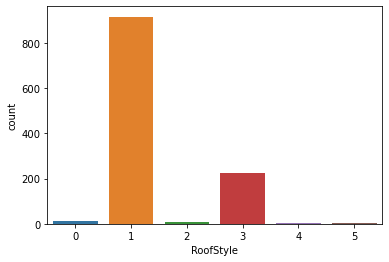

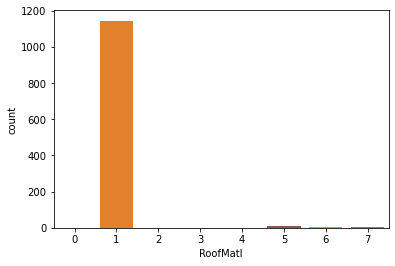

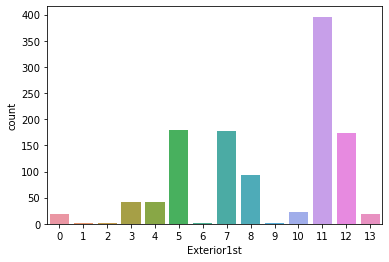

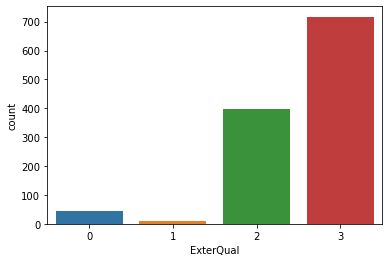

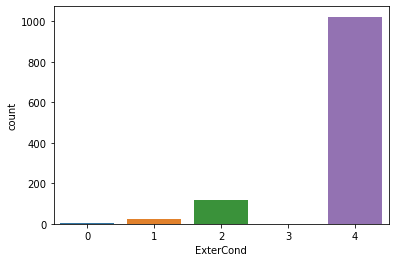

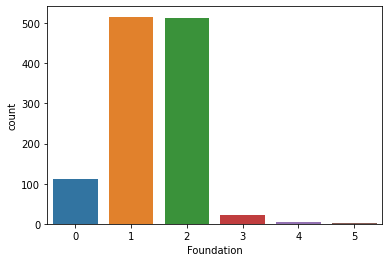

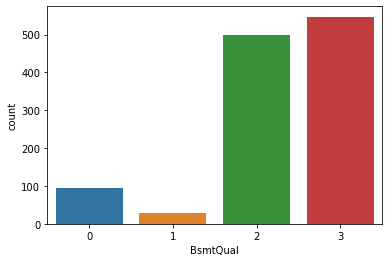

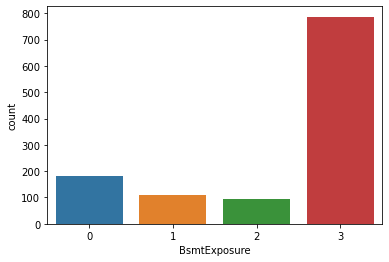

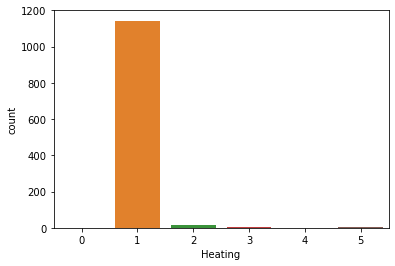

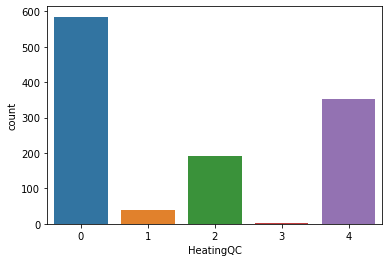

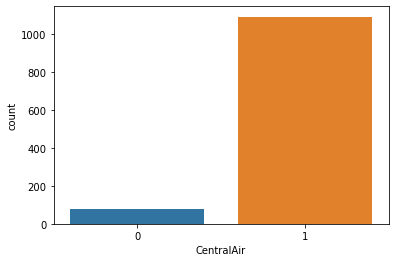

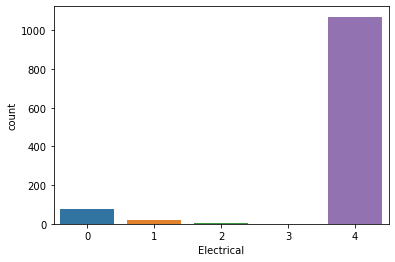

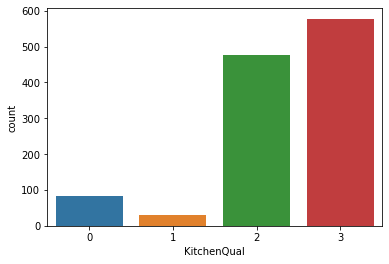

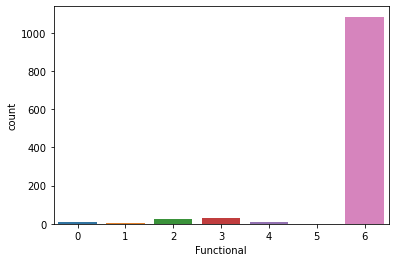

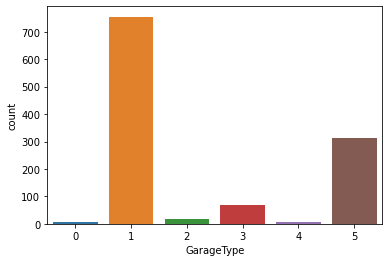

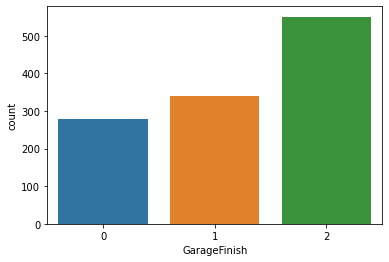

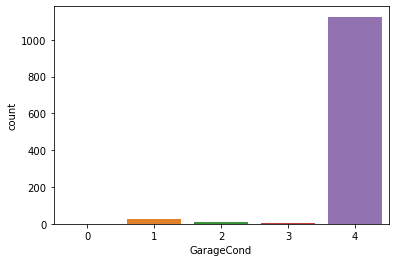

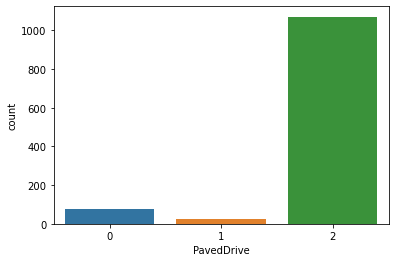

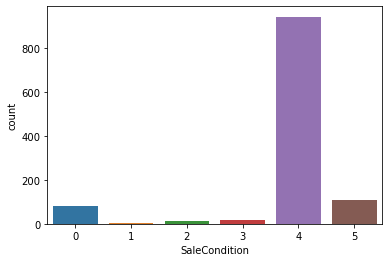

In [21]:
#visualizing each categorical column wrt count of each value
for i in categorical:
    sns.countplot(train[i])
    plt.show()

observing the categorical columns we can see that the columns are imbalanced, hence randomization is employed

# bivariate analysis

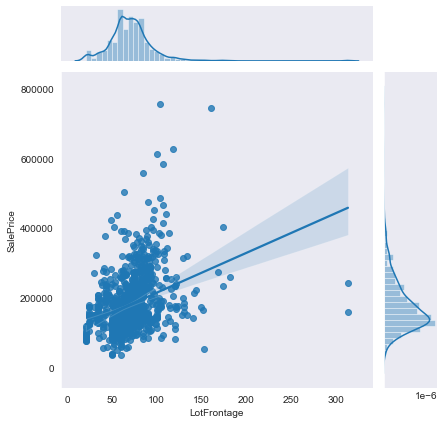

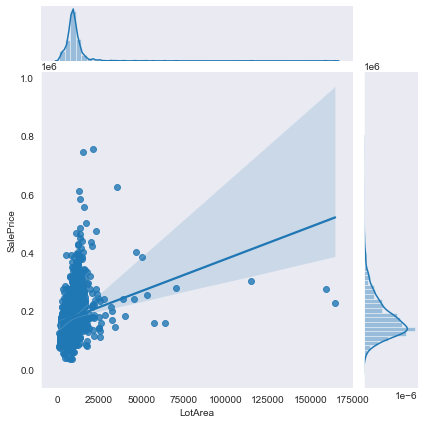

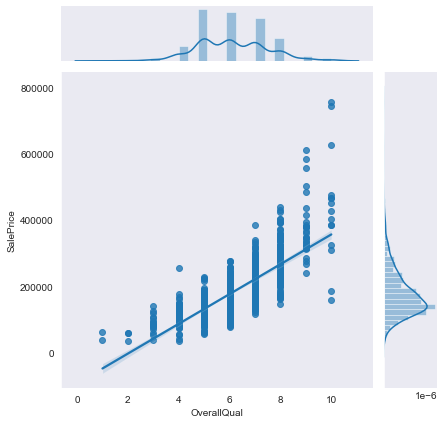

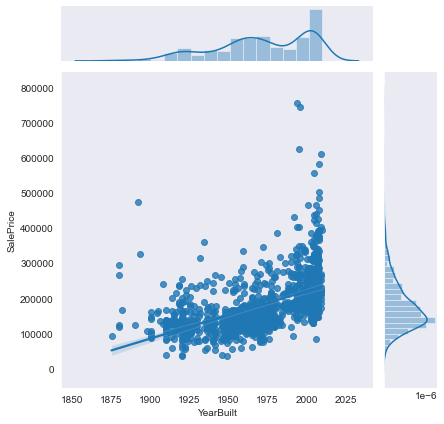

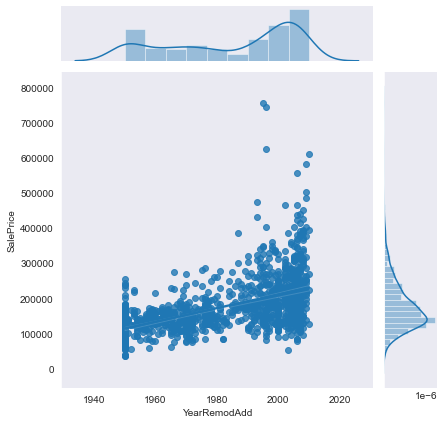

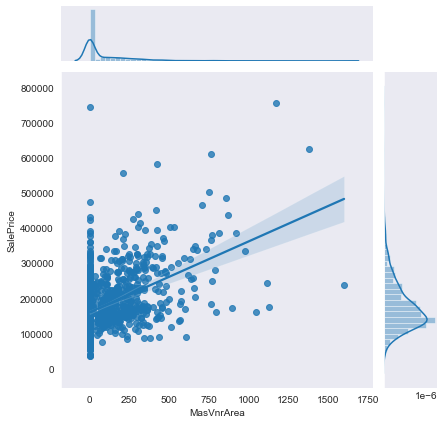

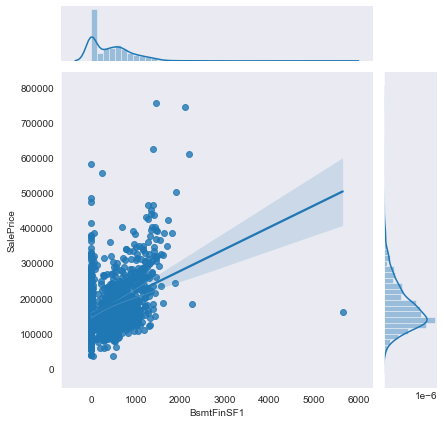

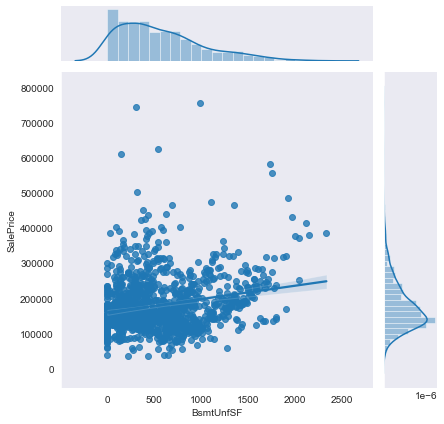

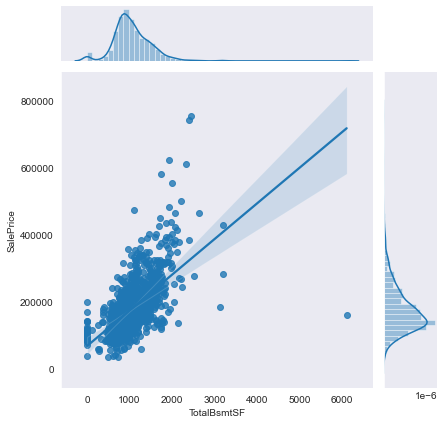

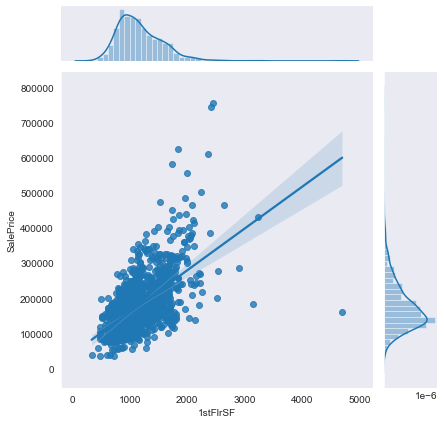

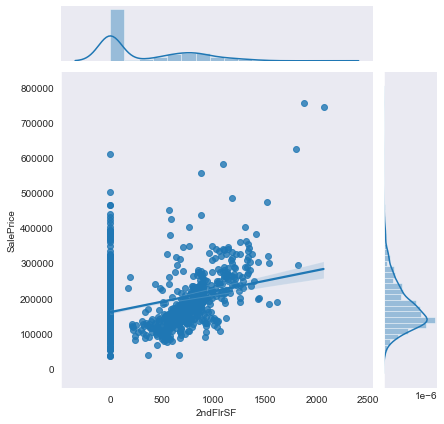

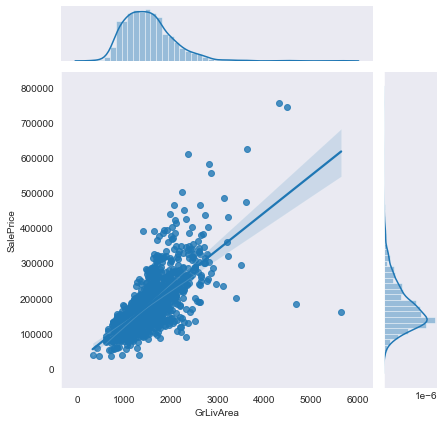

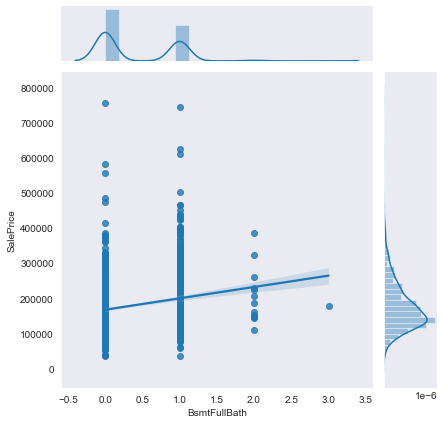

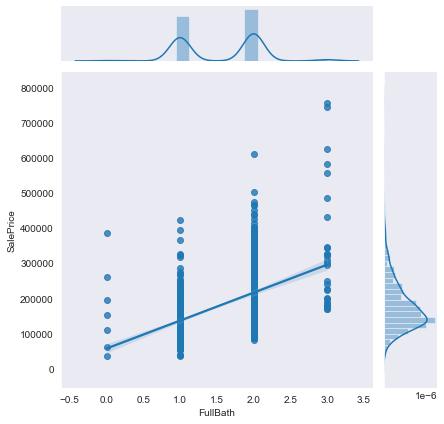

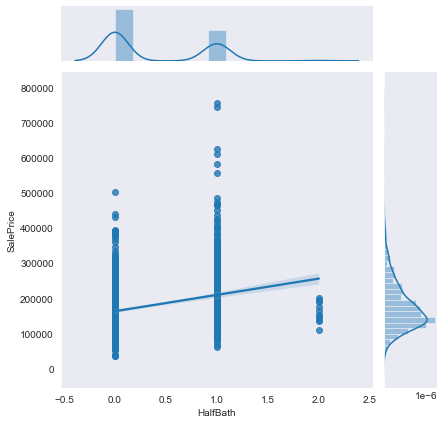

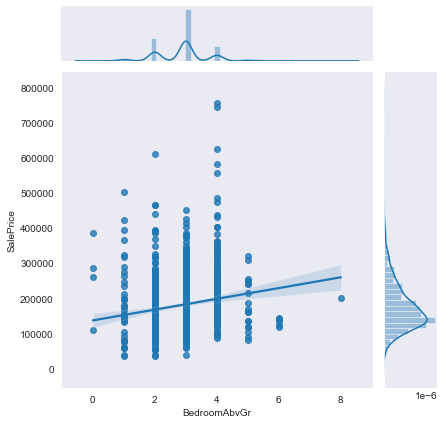

C:\Users\atakle\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


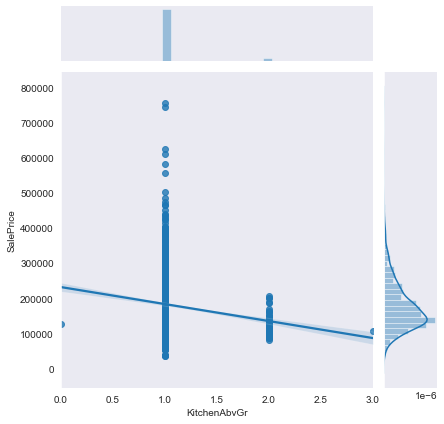

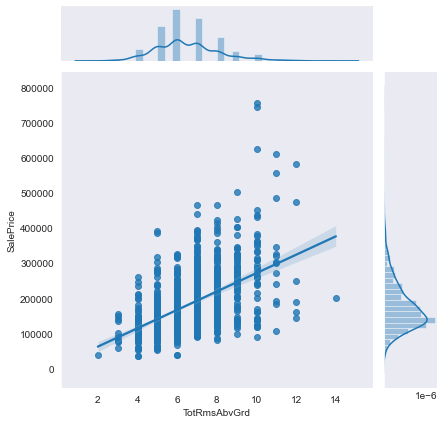

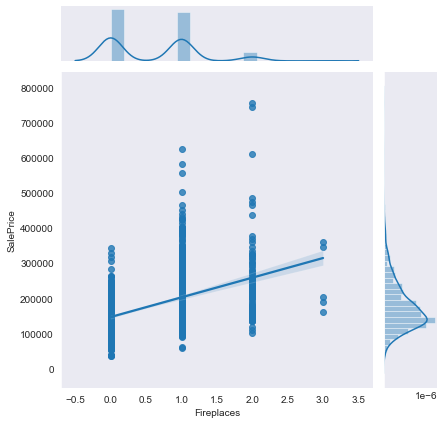

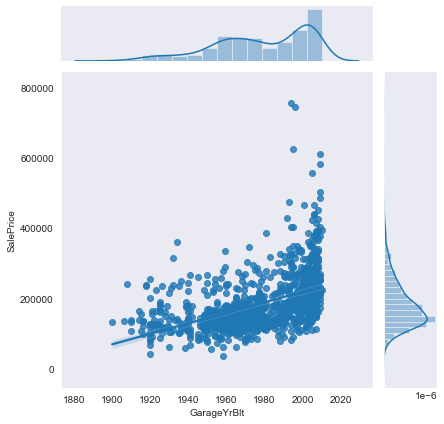

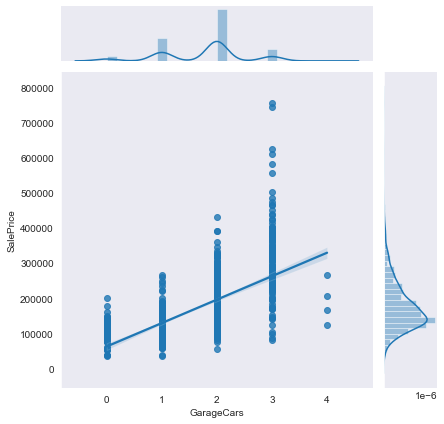

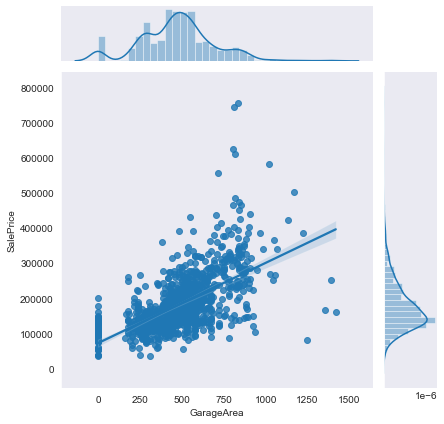

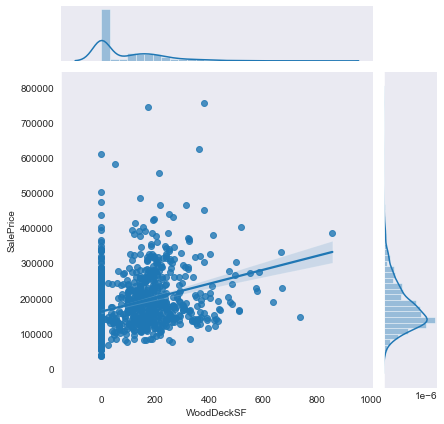

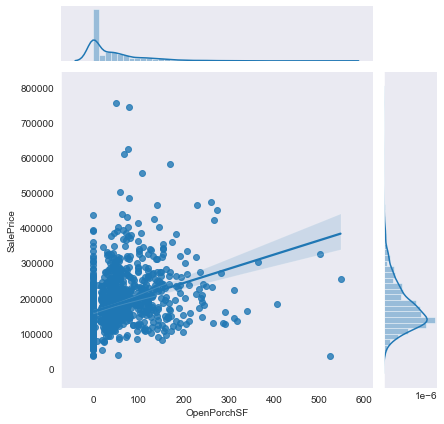

C:\Users\atakle\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


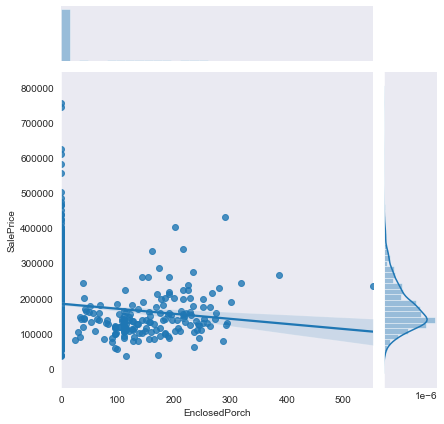

C:\Users\atakle\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


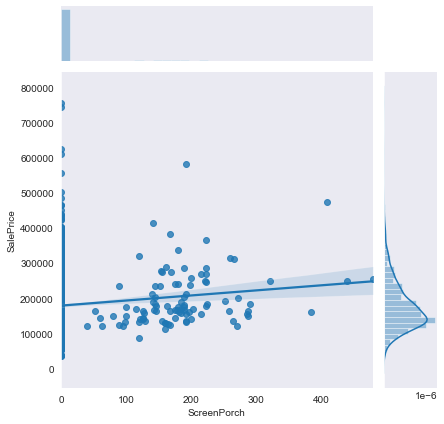

C:\Users\atakle\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


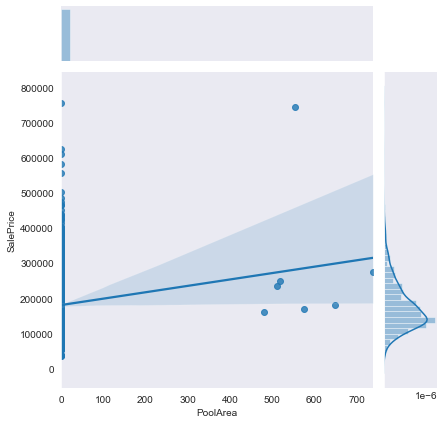

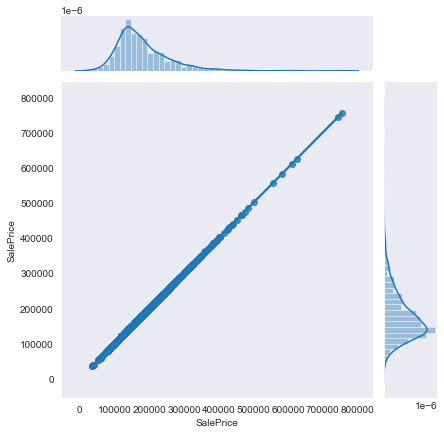

In [22]:
for i in cont:
    #sns.set_theme()
    sns.set_style('dark')
    sns.jointplot(y=train['SalePrice'],x=train[i],data=train,kind='reg')
    plt.show()

In [23]:
print(train['SalePrice'].skew())
print(train['SalePrice'].kurt())

1.953877705368286
7.390656691648756


# normalization

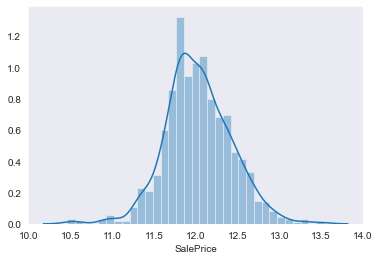

In [24]:
target_transform = np.log1p(train['SalePrice'])
sns.distplot(target_transform)

In [25]:
for i in cont:
    print(train[i].skew())

2.4502410142609246
10.659284548299626
0.1750824992845271
-0.5792035025736898
-0.49586353822203716
2.8261726776978673
1.8716059327957582
0.9090571206651619
1.7445908855423957
1.5137072331415693
0.8234785103609108
1.4499515426476701
0.6271059162466773
0.05780870861471475
0.6564917514090118
0.2438552945621391
4.365258908133523
0.6446565826319272
0.6719656450265
-0.6445640197769343
-0.3585558146314816
0.18966497539008143
1.504929246192858
2.41083972347696
3.0436098308918846
4.105740751686475
13.243710763499866
1.953877705368286


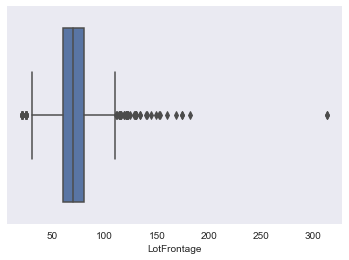

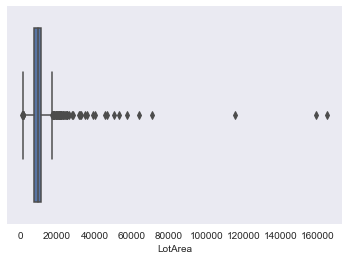

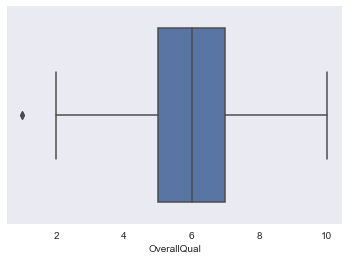

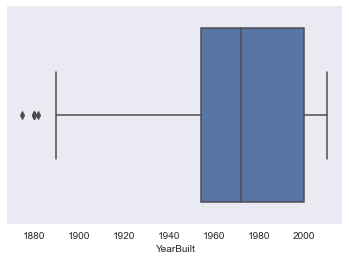

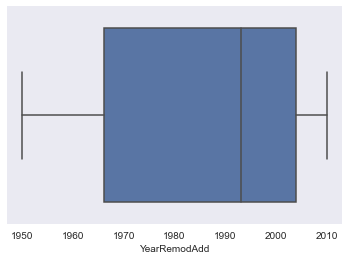

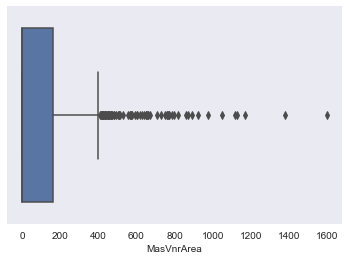

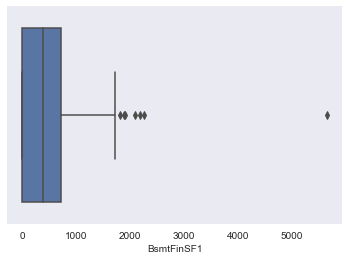

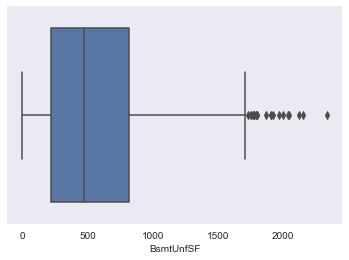

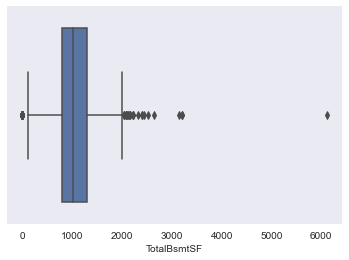

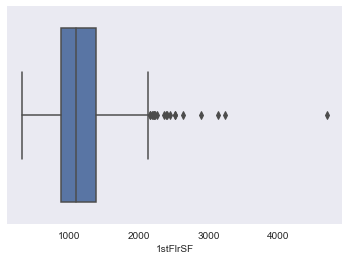

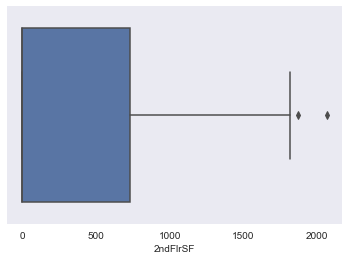

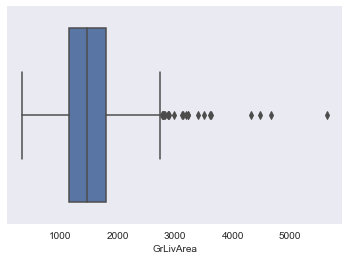

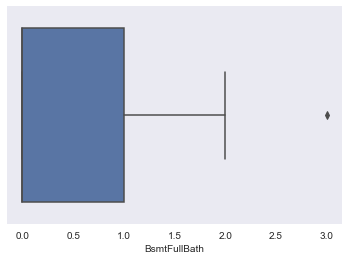

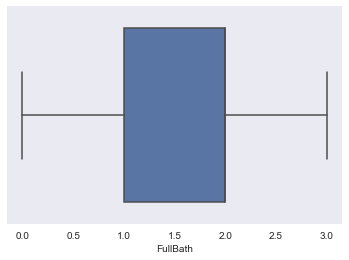

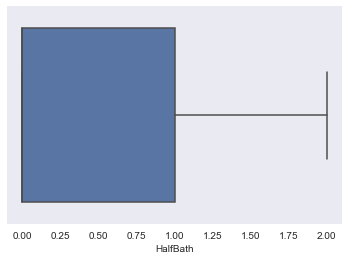

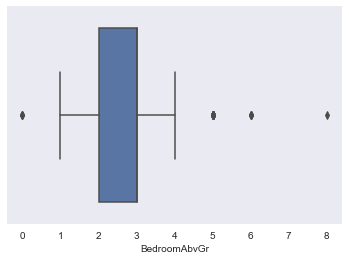

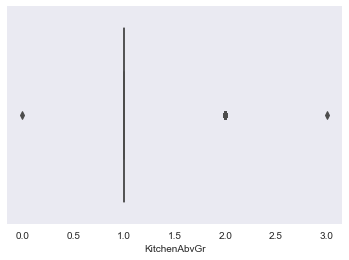

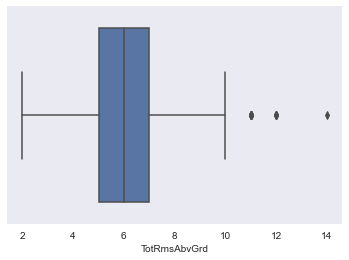

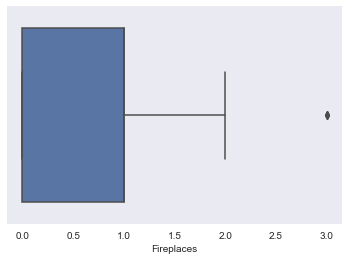

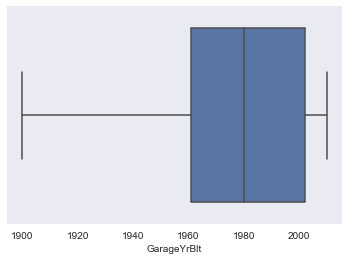

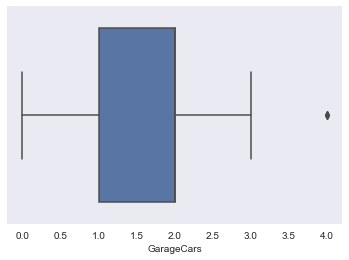

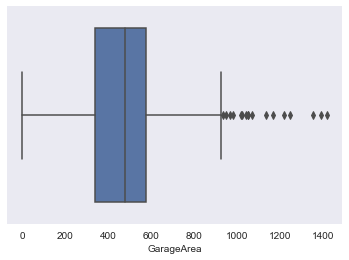

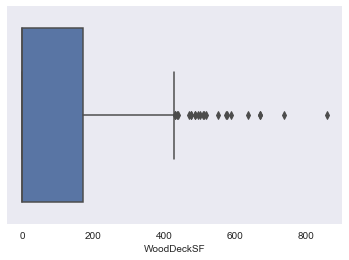

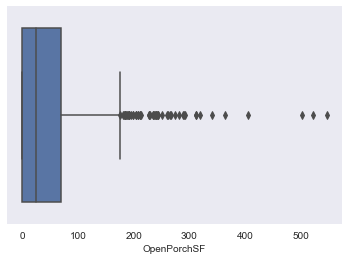

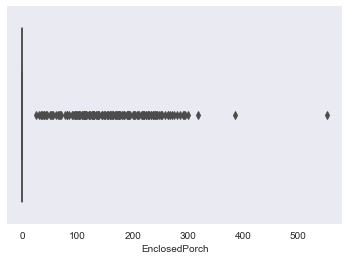

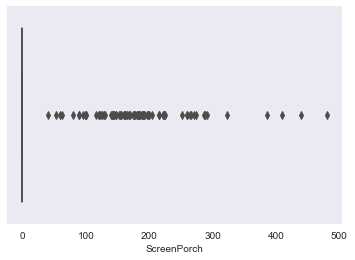

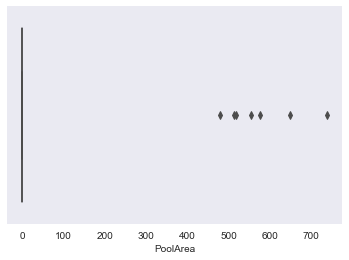

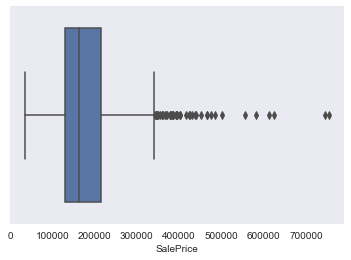

In [26]:
for i in cont:
    sns.boxplot(train[i],palette='deep')
    sns.despine(left=True)
    plt.show()

In [27]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())

In [28]:
cont

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice']

In [29]:
transform_train=pd.DataFrame({})
for i in cont:
    transform_train[i]=np.log1p(train[i])
transform_test=pd.DataFrame({})
for i in ['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea']:
    transform_test[i]=np.log1p(test[i])
for i in categorical:
    transform_train[i]=train[i]
print(transform_train.shape)
for i in categorical:
    transform_test[i]=test[i]
print(transform_test.shape)

(1168, 52)
(292, 51)


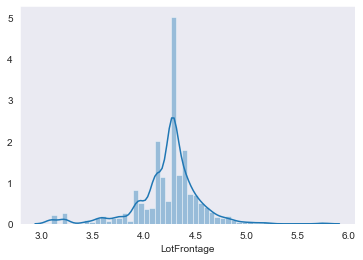

-0.8156648061917143


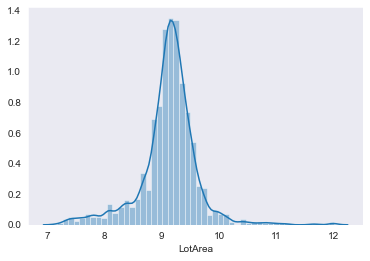

-0.16910699538994817


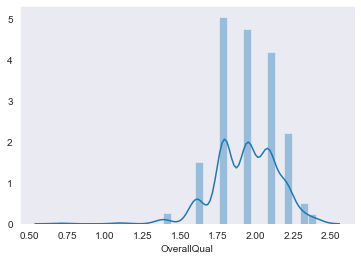

-0.68799194734455


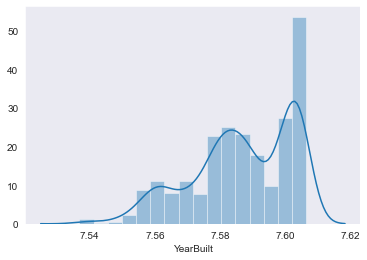

-0.6062449761958256


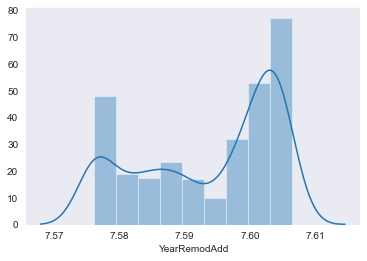

-0.5031681318196755


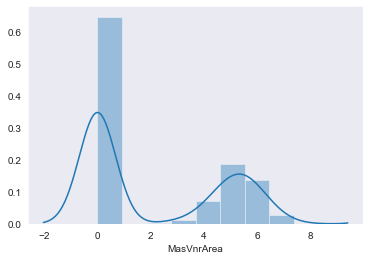

0.5090307625982139


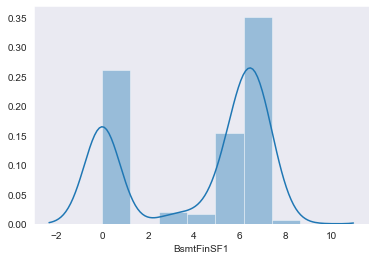

-0.606858648705479


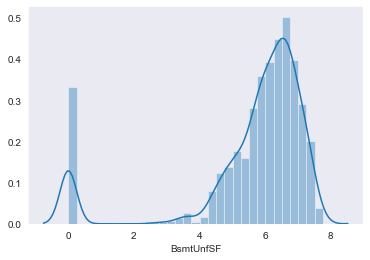

-2.1298824031472363


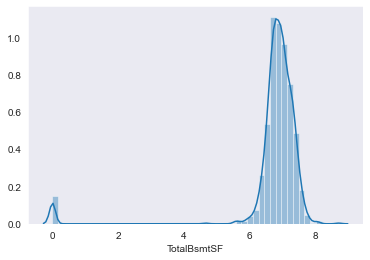

-5.1465737669947345


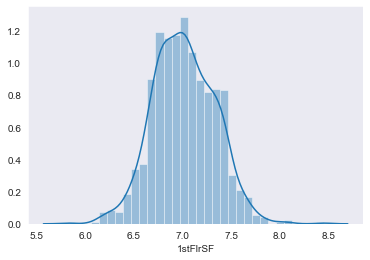

0.10579515253771477


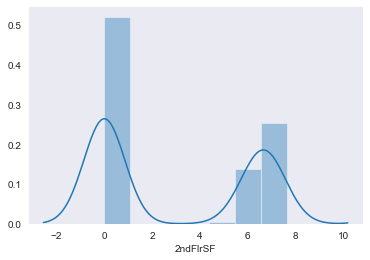

0.2893352437910369


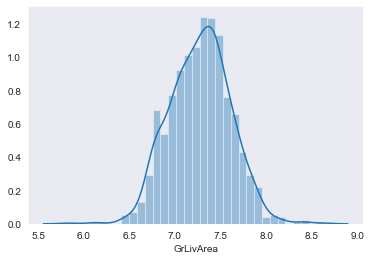

0.0014483429235394262


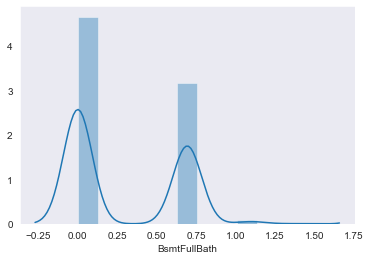

0.43079116889007907


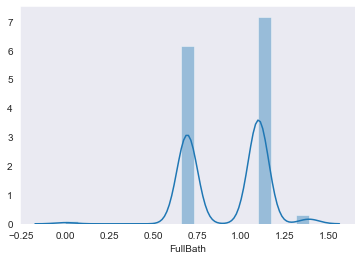

-0.36919884247014695


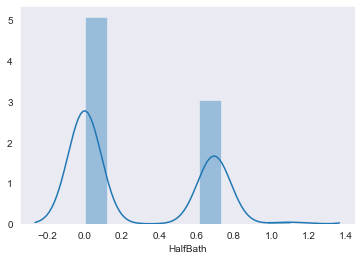

0.5436807632692655


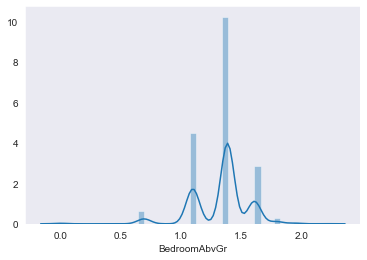

-1.1533970984807416


C:\Users\atakle\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


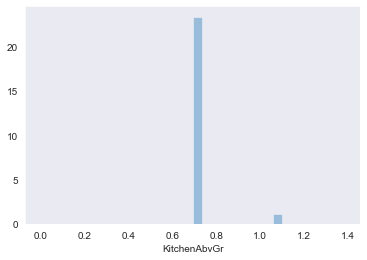

3.6783937366318606


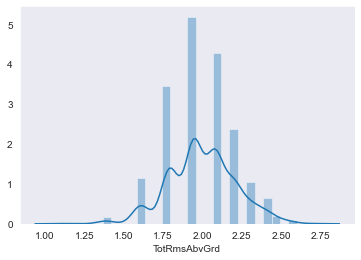

-0.07192563969766726


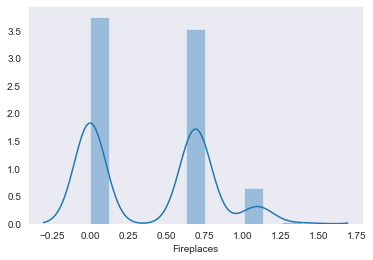

0.18827975791516569


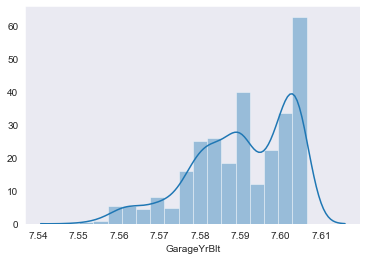

-0.6868605108067307


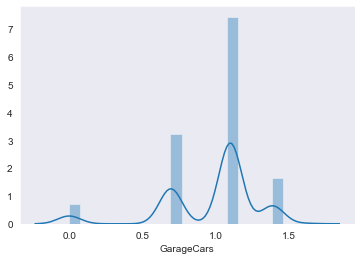

-1.3934289016135033


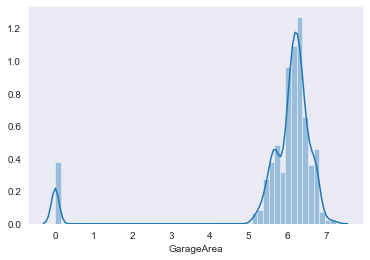

-3.508378831165335


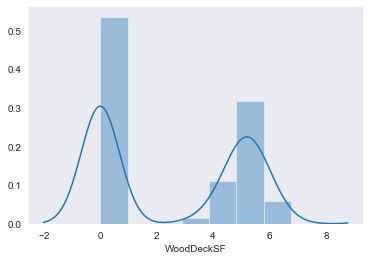

0.1310751936177036


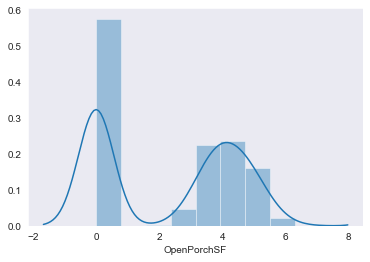

-0.004278508102839663


C:\Users\atakle\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


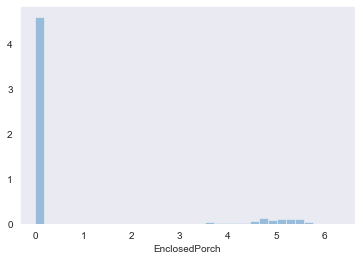

2.0796099192432433


C:\Users\atakle\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


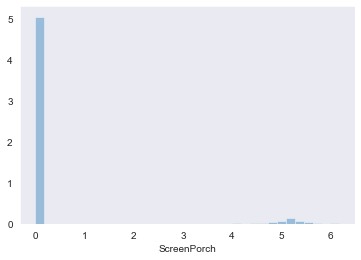

3.1046648935102006


C:\Users\atakle\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


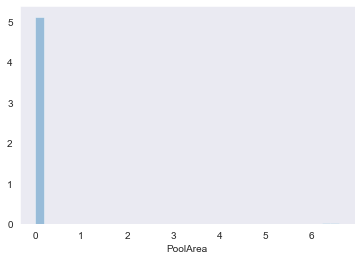

12.826712665868666


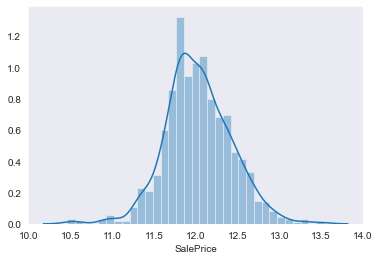

0.07360997199445295


In [30]:
for i in cont:
    sns.distplot(transform_train[i])
    plt.show()
    print(transform_train[i].skew())

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(transform_train))
z


array([[0.14626083, 1.21764042, 0.02557883, ..., 0.1871929 , 0.291828  ,
        0.20793187],
       [1.07739088, 1.09744261, 1.2557247 , ..., 0.1871929 , 0.291828  ,
        0.20793187],
       [0.97468821, 0.16763133, 0.67919467, ..., 0.1871929 , 0.291828  ,
        0.20793187],
       ...,
       [3.27502729, 2.7435243 , 0.02557883, ..., 0.1871929 , 0.291828  ,
        0.20793187],
       [0.96873266, 0.13826922, 1.62140155, ..., 5.77575174, 3.69478135,
        0.20793187],
       [0.14626083, 0.29301727, 0.02557883, ..., 0.1871929 , 0.291828  ,
        0.20793187]])

In [32]:
transform_train.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice,MSZoning,LotShape,Neighborhood,Condition1,HouseStyle,RoofStyle,RoofMatl,Exterior1st,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageCond,PavedDrive,SaleCondition
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,4.231292,9.117761,1.940684,7.586651,7.593701,2.110603,4.218684,5.630350,6.752934,7.014755,2.867188,7.275389,0.291148,0.916774,0.266962,1.332918,0.711199,1.998564,0.401756,7.590370,0.976393,5.819842,2.490519,2.290651,0.715271,0.418414,0.038039,12.028299,3.013699,1.938356,12.145548,2.032534,3.043664,1.402397,1.086473,8.659247,2.530822,3.725171,1.395548,2.282534,2.273116,1.035959,1.569349,0.933219,3.688356,2.328767,5.742295,2.225171,1.233733,3.905822,1.853596,3.768836
std,0.309265,0.505184,0.204384,0.015358,0.010495,2.622662,2.997574,1.880368,1.152013,0.316539,3.295587,0.331346,0.350610,0.223338,0.343060,0.227686,0.088447,0.210399,0.396441,0.012278,0.321142,1.448866,2.604423,2.158502,1.752412,1.411792,0.490211,0.397420,0.633120,1.412262,6.010364,0.871703,1.898625,0.832539,0.642848,3.097443,0.699425,0.744463,0.709379,0.857830,1.144218,0.302078,1.749129,0.249749,1.042606,0.832992,0.987250,1.767017,0.809747,0.503323,0.501894,1.112208
min,3.091042,7.170888,0.693147,7.536897,7.576097,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,7.550135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.110874,8.938858,1.791759,7.578145,7.584265,0.000000,0.000000,5.379897,6.684612,6.794587,0.000000,7.042504,0.000000,0.693147,0.000000,1.098612,0.693147,1.791759,0.000000,7.582229,0.693147,5.826000,0.000000,0.000000,0.000000,0.000000,0.000000,11.778176,3.000000,0.000000,7.000000,2.000000,2.000000,1.000000,1.000000,7.000000,2.000000,4.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,4.000000,2.000000,6.000000,1.000000,1.000000,4.000000,2.000000,4.000000
50%,4.276506,9.161518,1.945910,7.587311,7.597898,0.000000,5.957131,6.163315,6.914234,7.000790,0.000000,7.292677,0.000000,1.098612,0.000000,1.386294,0.693147,1.945910,0.693147,7.590445,1.098612,6.175867,0.000000,3.218876,0.000000,0.000000,0.000000,12.007597,3.000000,3.000000,12.000000,2.000000,2.000000,1.000000,1.000000,11.000000,3.000000,4.000000,1.000000,2.000000,3.000000,1.000000,0.000000,1.000000,4.000000,2.000000,6.000000,1.000000,1.000000,4.000000,2.000000,4.000000
75%,4.385132,9.351536,2.079442,7.601402,7.603399,5.081404,6.572981,6.705639,7.164333,7.239215,6.593045,7.493317,0.693147,1.098612,0.693147,1.386294,0.693147,2.079442,0.693147,7.601902,1.098612,6.357842,5.147494,4.262680,0.000000,0.000000,0.000000,12.278398,3.000000,3.000000,17.000000,2.000000,5.000000,1.000000,1.000000,11.000000,3.000000,4.000000,2.000000,3.000000,3.000000,1.000000,4.000000,1.000000,4.000000,3.000000,6.000000,5

In [33]:
#dropping these as maximum values are 0
transform_train.drop(['EnclosedPorch','ScreenPorch','PoolArea'],axis=1,inplace=True)
transform_test.drop(['EnclosedPorch','ScreenPorch','PoolArea'],axis=1,inplace=True)

In [34]:
q1=train.quantile(0.25)
q3=train.quantile(0.75)
IQR=q3-q1
IQR

MSZoning             0.00
LotFrontage         19.25
LotArea           3894.00
LotShape             3.00
Neighborhood        10.00
Condition1           0.00
HouseStyle           3.00
OverallQual          2.00
YearBuilt           46.00
YearRemodAdd        38.00
RoofStyle            0.00
RoofMatl             0.00
Exterior1st          4.00
MasVnrArea         160.00
ExterQual            1.00
ExterCond            0.00
Foundation           1.00
BsmtQual             1.00
BsmtExposure         1.00
BsmtFinSF1         714.50
BsmtUnfSF          600.00
TotalBsmtSF        492.50
Heating              0.00
HeatingQC            4.00
CentralAir           0.00
Electrical           0.00
1stFlrSF           500.00
2ndFlrSF           729.00
GrLivArea          651.75
BsmtFullBath         1.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
KitchenQual          1.00
TotRmsAbvGrd         2.00
Functional           0.00
Fireplaces           1.00
GarageType  

In [35]:
transform_train.shape

(1168, 49)

In [36]:
transform_test.shape

(292, 48)

# testing different models by splitting train data first

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [38]:
transform_train.dropna(inplace=True)
transform_test.dropna(inplace=True)

In [39]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
ds_tran=pt.fit_transform(transform_train)
train_ds=pd.DataFrame(ds_tran)
ds_tran=pt.fit_transform(transform_test)
test_ds=pd.DataFrame(ds_tran)


C:\Users\atakle\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\atakle\Anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\atakle\Anaconda3\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\atakle\Anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\atakle\Anaconda3\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\atakle\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


In [40]:
x=transform_train.loc[:, transform_train.columns != 'SalePrice']
y=transform_train['SalePrice']

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20,random_state=43)

In [42]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
r2_score(y_test,pred)

0.8234310187661616

In [43]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr,x,y,cv=5,scoring='r2').mean())
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,pred))
print(mean_squared_error(y_test,pred,squared=False))

0.8595361877045022
0.028801901681653898
0.1697112302755887


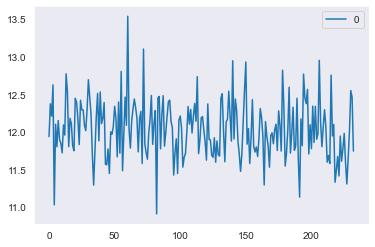

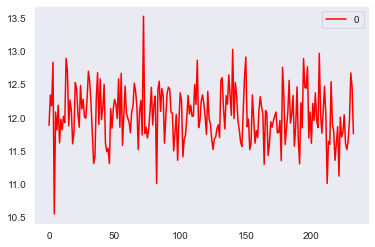

In [44]:
(pd.DataFrame(pred)).plot(kind='line')
pd.DataFrame(y_test.to_numpy()).plot(kind='line',color='red')

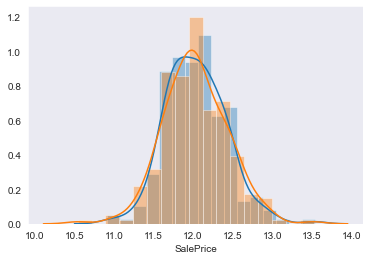

In [45]:
sns.distplot(pred)
sns.distplot(y_test)

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
r2_score(y_test,pred_rfr)

0.8390841478112818

In [47]:
print(cross_val_score(rfr,x,y,cv=5,scoring='r2').mean())
print(mean_squared_error(y_test,pred_rfr))
print(mean_squared_error(y_test,pred_rfr,squared=False))

0.8531777991847281
0.02624856597898751
0.16201409191483163


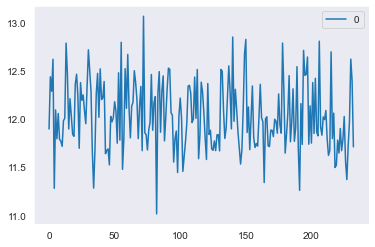

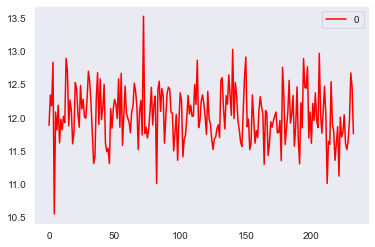

In [48]:
(pd.DataFrame(pred_rfr)).plot(kind='line')
pd.DataFrame(y_test.to_numpy()).plot(kind='line',color='red')

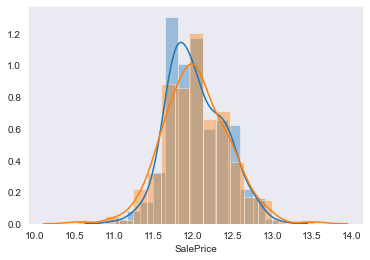

In [49]:
sns.distplot(pred_rfr)
sns.distplot(y_test)

In [50]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
print(r2_score(xgb_pred,y_test))

0.8183236628641186


In [51]:
print(cross_val_score(xgb,x,y,cv=5,scoring='r2').mean())
print(mean_squared_error(y_test,xgb_pred))
print(mean_squared_error(y_test,xgb_pred,squared=False))

0.8504647144741101
0.024978073770768074
0.15804453097392543


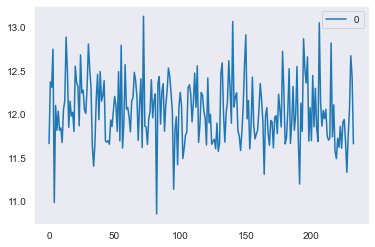

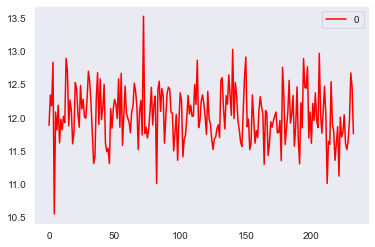

In [52]:
(pd.DataFrame(xgb_pred)).plot(kind='line')
pd.DataFrame(y_test.to_numpy()).plot(kind='line',color='red')

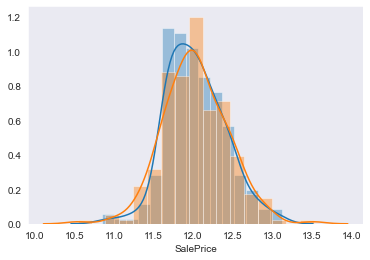

In [53]:
sns.distplot(xgb_pred)
sns.distplot(y_test)

In [54]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print(r2_score(y_test,pred_svr))
print(cross_val_score(svr,x,y,cv=5,scoring='r2').mean())
print(mean_squared_error(y_test,pred_svr))
print(mean_squared_error(y_test,pred_svr,squared=False))

0.8065346715042797
0.8263326355744374
0.03155803092482667
0.17764580187785656


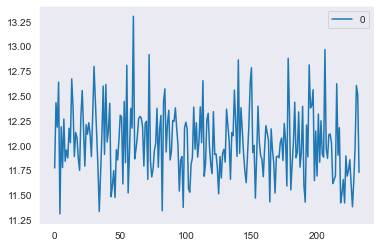

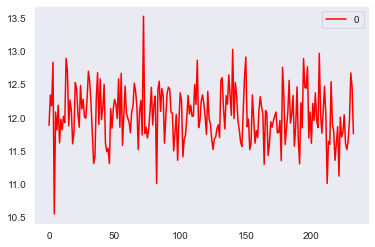

In [55]:
(pd.DataFrame(pred_svr)).plot(kind='line')
pd.DataFrame(y_test.to_numpy()).plot(kind='line',color='red')

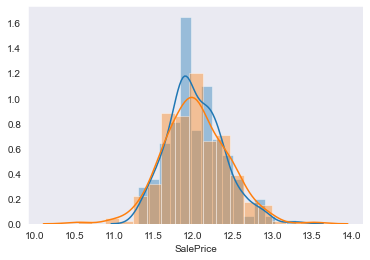

In [56]:
sns.distplot(pred_svr)
sns.distplot(y_test)

In [57]:
from sklearn.model_selection import GridSearchCV
model=RandomForestRegressor()
parameters={'n_estimators':[50,100,150,200],'criterion':('mse','mae')}
clf=GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'n_estimators': [50, 100, 150, 200]})

In [58]:
print(clf.best_score_)
print(clf.best_estimator_.criterion)
print(clf.best_params_)

0.8529256370909044
mse
{'criterion': 'mse', 'n_estimators': 150}


In [59]:
rfr=RandomForestRegressor(criterion='mse',n_estimators=100)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print(r2_score(y_test,pred_rfr))
print(mean_squared_error(y_test,pred_rfr))
print(mean_squared_error(y_test,pred_rfr,squared=False))
print(cross_val_score(rfr,x,y,cv=5,scoring='r2').mean())

0.8381288583320946
0.026404392633617352
0.16249428492601625
0.8526615176184672


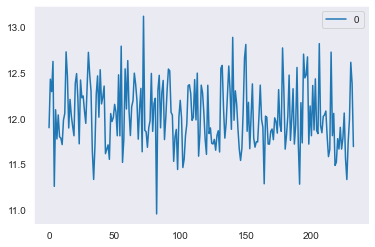

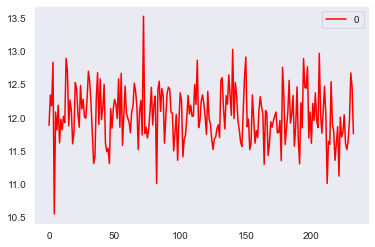

In [60]:
(pd.DataFrame(pred_rfr)).plot(kind='line')
pd.DataFrame(y_test.to_numpy()).plot(kind='line',color='red')

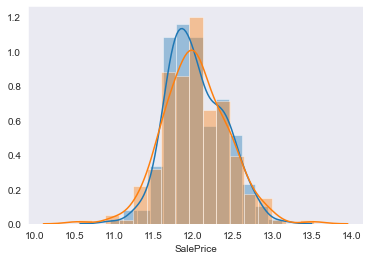

In [61]:
sns.distplot(pred_rfr)
sns.distplot(y_test)

In [62]:
from sklearn.svm import SVR
svr=SVR()
parameters={'C':[1,5,10,15,20],'kernel':('linear','poly','rbf')}
clf=GridSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.8735342359311001
linear
{'C': 10, 'kernel': 'linear'}


In [63]:
svr=SVR(kernel='linear',C=10)
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print(r2_score(y_test,pred_svr))
print(mean_squared_error(y_test,pred_svr))
print(mean_squared_error(y_test,pred_svr,squared=False))
print(cross_val_score(svr,x,y,cv=5,scoring='r2').mean())

0.8157860118065687
0.030048953894715867
0.17334634087489664
0.860791856591625


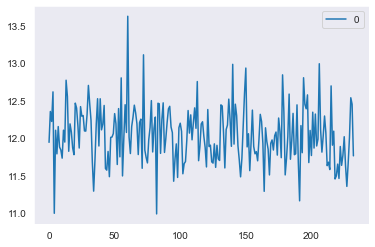

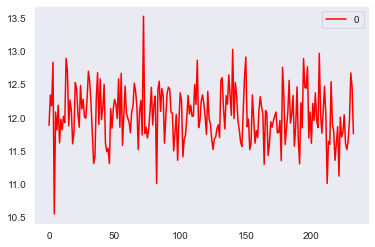

In [64]:
(pd.DataFrame(pred_svr)).plot(kind='line')
pd.DataFrame(y_test.to_numpy()).plot(kind='line',color='red')

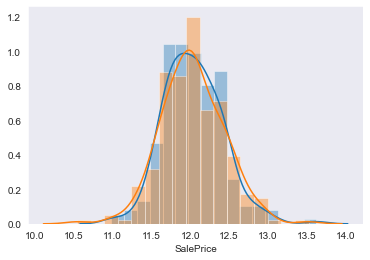

In [65]:
sns.distplot(pred_svr)
sns.distplot(y_test)

1. observing the visualizations we can see that most identical are the prediction curves for linear regression and optimized svr
2. we will be finalizing these 2 to predict on test data
3. as a optimization for linear regression model we will try to tweak the random state

In [66]:
x1=transform_train.loc[:, transform_train.columns != 'SalePrice']
y1=transform_train['SalePrice']
r2_scr = 0
random_state=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .20,random_state=i)
    lr.fit(x1_train,y1_train)
    pred_lr = lr.predict(x1_test)
    x=r2_score(y1_test,pred_lr)
    if x>r2_scr:
        r2_scr = x
        random_state=i

In [67]:
print(r2_scr,random_state)

0.9183864032808686 86


In [68]:
x=transform_train.loc[:, transform_train.columns != 'SalePrice']
y=transform_train['SalePrice']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20,random_state=86)
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
print(r2_score(y_test,pred_lr))
print(mean_squared_error(y_test,pred_lr))
print(mean_squared_error(y_test,pred_lr,squared=False))
print(cross_val_score(svr,x,y,cv=5,scoring='r2').mean())

0.9183864032808686
0.012601730027987479
0.1122574274958565
0.860791856591625


In [69]:
import joblib
(pd.DataFrame(lr.predict(transform_test))).to_csv('predictions_lr')
joblib.dump(lr,'lr_prices.pkl')

['lr_prices.pkl']

In [70]:
(pd.DataFrame(svr.predict(transform_test))).to_csv('predictions_svr')
joblib.dump(svr,'svr_prices.pkl')

['svr_prices.pkl']

In [71]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

In [72]:
pip install jupyter-plotly-dash

Note: you may need to restart the kernel to use updated packages.


In [73]:
from jupyter_plotly_dash import JupyterDash

In [74]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = JupyterDash('SimpleExample')

app.layout = html.Div([
    dcc.RadioItems(
        id='dropdown-color',
        options=[{'label': c, 'value': c.lower()}
                 for c in ['Red', 'Green', 'Blue']],
        value='red'
    ),
    html.Div(id='output-color'),
    dcc.RadioItems(
        id='dropdown-size',
        options=[{'label': i, 'value': j}
                 for i, j in [('L','large'), ('M','medium'), ('S','small')]],
        value='medium'
    ),
    html.Div(id='output-size')

])

@app.callback(
    dash.dependencies.Output('output-color', 'children'),
    [dash.dependencies.Input('dropdown-color', 'value')])
def callback_color(dropdown_value):
    return "The selected color is %s." % dropdown_value

@app.callback(
    dash.dependencies.Output('output-size', 'children'),
    [dash.dependencies.Input('dropdown-color', 'value'),
     dash.dependencies.Input('dropdown-size', 'value')])
def callback_size(dropdown_color, dropdown_size):
    return "The chosen T-shirt is a %s %s one." %(dropdown_size,
                                                  dropdown_color)



app

In [75]:
app=JupyterDash('SimpleExample')
app.layout = html.Div([
    html.P("Color:"),
    dcc.Dropdown(
        id="dropdown",
        options=[
            {'label': x, 'value': x}
            for x in ['Gold', 'MediumTurquoise', 'LightGreen']
        ],
        value='Gold',
        clearable=False,
    ),
    dcc.Graph(id="graph"),
    dcc.Textarea()
])

@app.callback(
    Output("graph", "figure"), 
    [Input("dropdown", "value")])
def display_color(color):
    fig = go.Figure(
        data=go.Bar(y=[2, 3, 1], marker_color=color))
    return fig

In [77]:
app